Decision tree is a supervised ML algorithm, it is mainly used used in classification tassk but will also be used in regressiont tasks too

It works by splitting the dataset into branches based on feature values, forming tree like structure where:                                   
Internal nodes represent tests o features                 
Branches represent outcome of those tests                 
Leaf node represents the final output(class label or value)

![decision tree flow chart](https://www.smartdraw.com/decision-tree/img/structure-of-a-decision-tree.png)

![another example of decision tree flowchart working](https://res.cloudinary.com/dyd911kmh/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png)

The algorithm splits the data based on the feature that gives the best seperation using metrics like:                 
1. Gini Impurity
2. Information Gain(Entropy)
3. Variance Reduction(for regression) 

**Information Gain**                  
- It is calculated for a split by subtracting the weighted entropies of each branch fro the original entropy
- When training a decision tree using htese metrics, the split is best chosen by maximizing Information Gain
- Information theory tries to measure and define this degree of disorganization in a system known as Entropy(uncertainity)
- If the same sample is completely homogeneous, then the entropy is 0 and if the sample is an equally divided (50%-50%), it has entropy of 1.
- Entropy can be calculated using formula:
- Entropy = -sigma(pi*log2pi)
- Here pi is the probability of a particular category in that node(like success, failure etc) 

**Steps to calculate Information Gain**
1. Calculate entropy of parent node
2. Calculate entropy of each individual node of split and calculate weighted average of all sub-nodes available in split
3. Calculate the difference in entropy before and after split

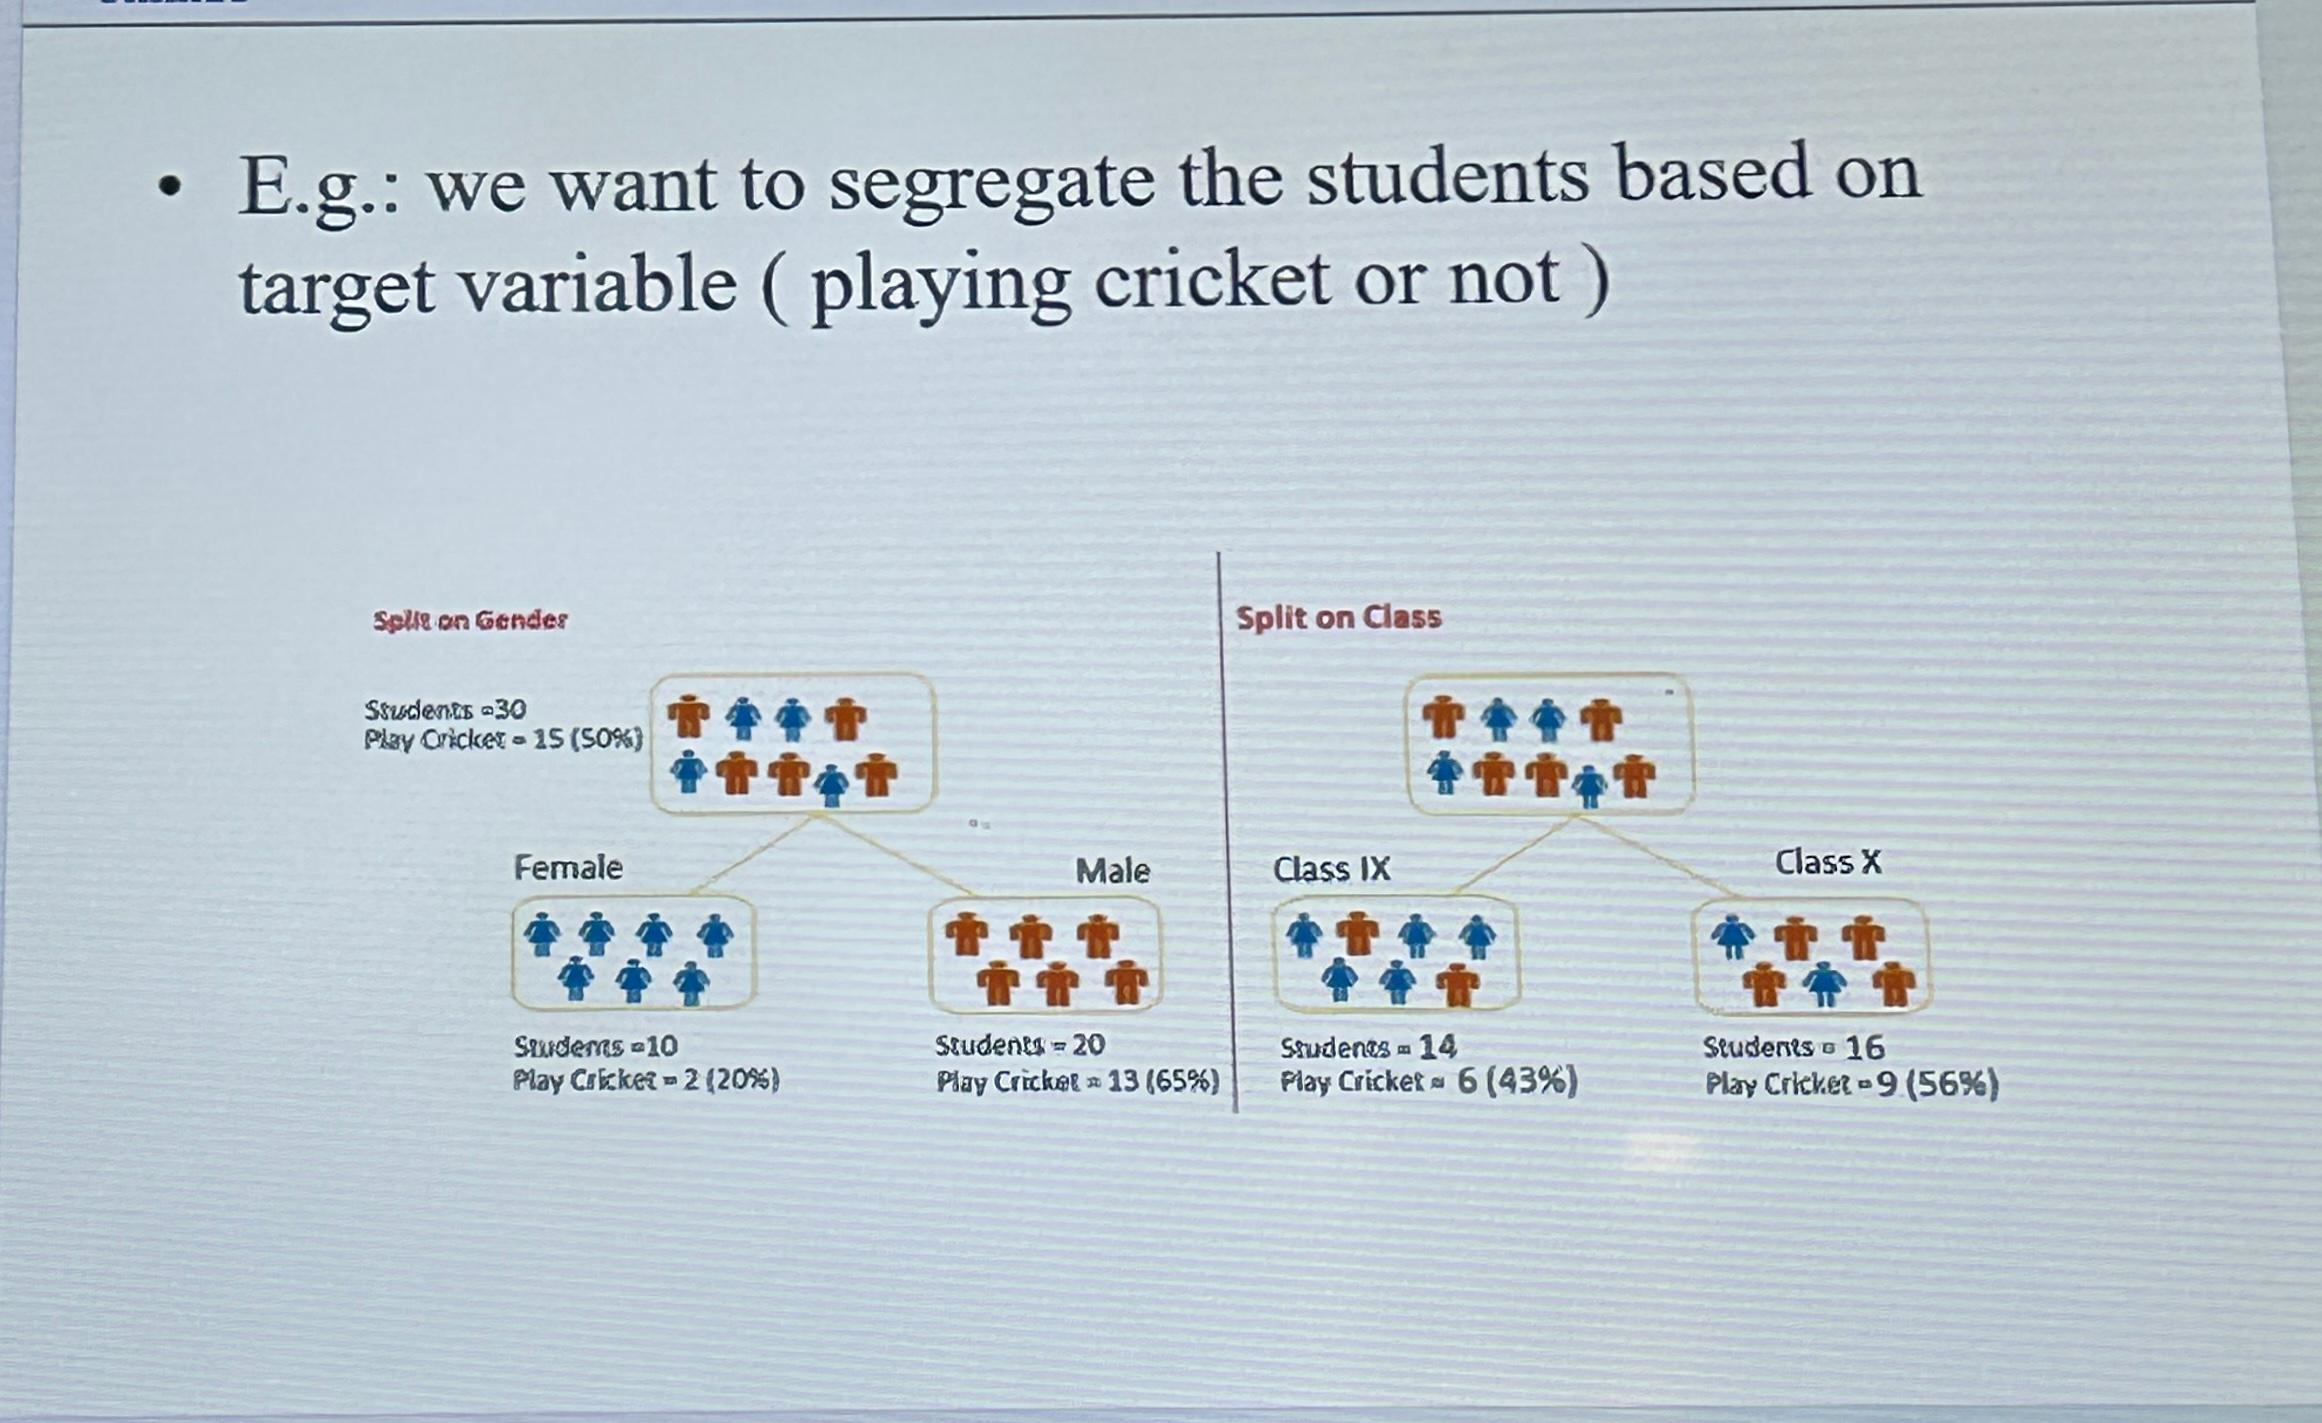

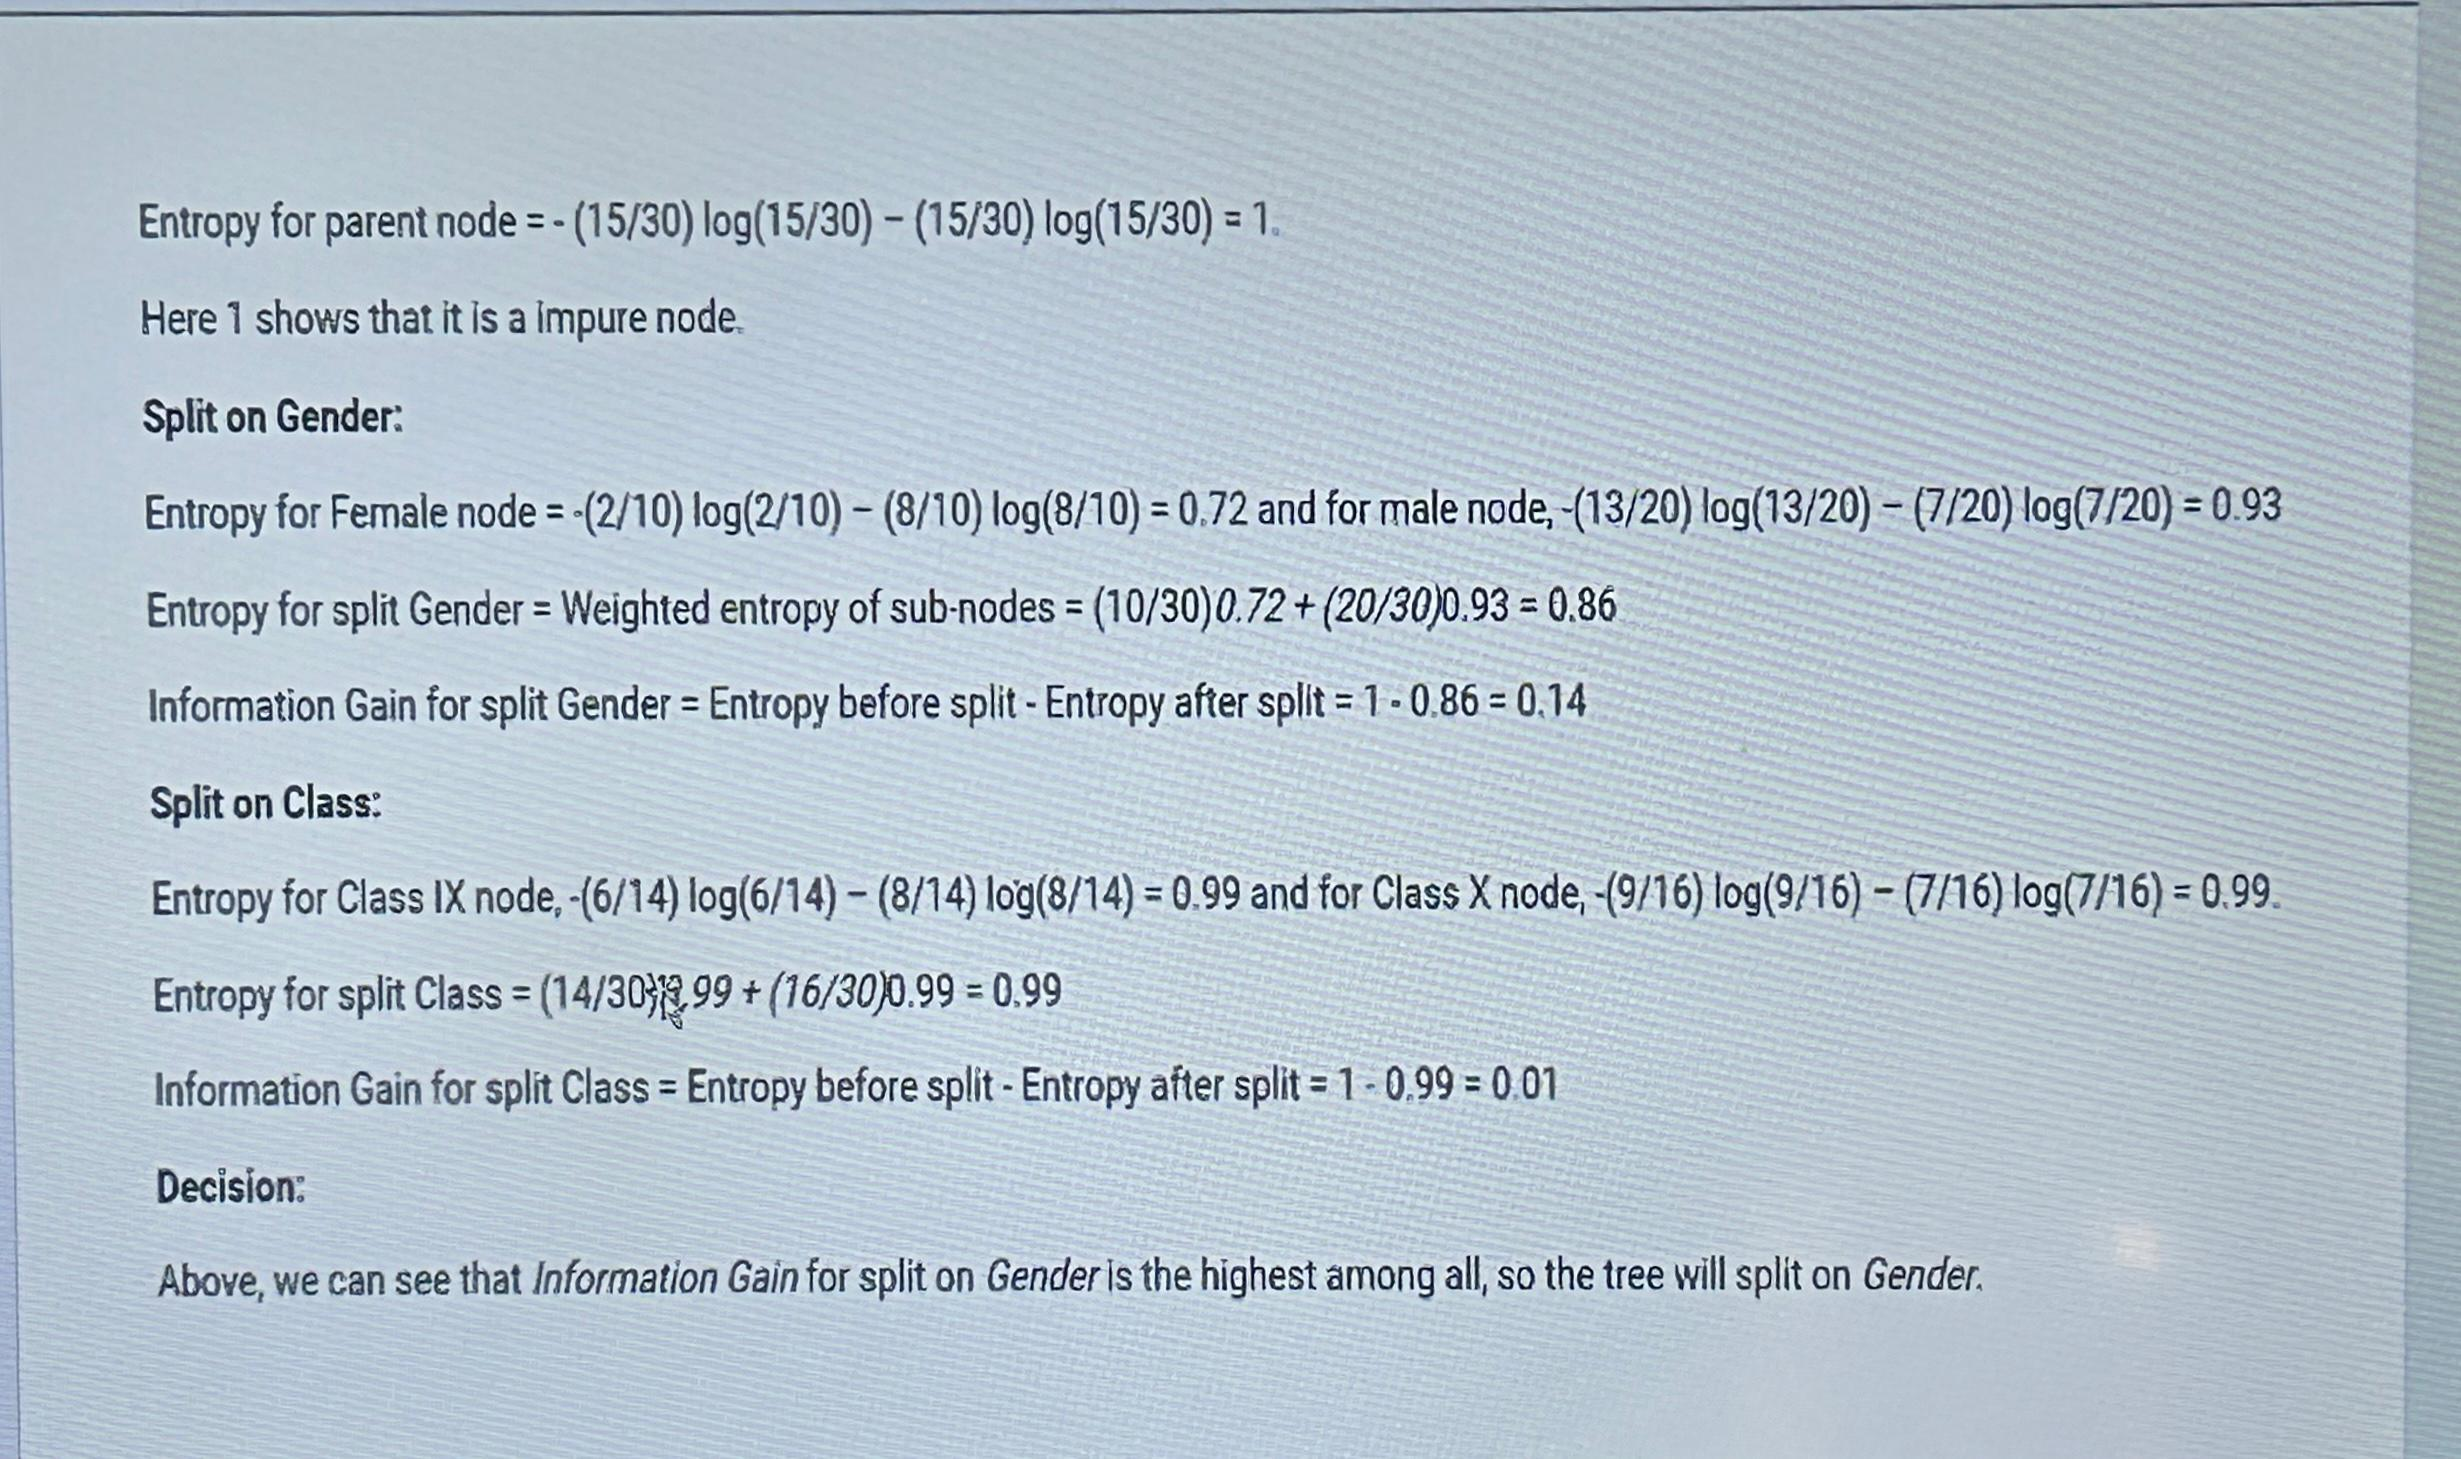

**Pros and Cons**            
Advantages              
- Easy to understand and interpret


Disadvantages


One example on Decision Tree

In [14]:
import pandas as pd

In [15]:
df=pd.read_csv(r"C:\Users\PHANEENDRA\Downloads\Cranes ML\daily_weather.csv")
df

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1
...,...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,1
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,1
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,1
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1092 non-null   float64
 1   air_temp_9am            1090 non-null   float64
 2   avg_wind_direction_9am  1091 non-null   float64
 3   avg_wind_speed_9am      1092 non-null   float64
 4   max_wind_direction_9am  1092 non-null   float64
 5   max_wind_speed_9am      1091 non-null   float64
 6   rain_accumulation_9am   1089 non-null   float64
 7   rain_duration_9am       1092 non-null   float64
 8   relative_humidity_9am   1095 non-null   float64
 9   high_humidity_3pm       1095 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.7 KB


In [17]:
df.isnull().sum()

air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
high_humidity_3pm         0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum().sum()

0

In [20]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_leaf_nodes=10,criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

In [57]:
dt.score(x_test,y_test)

0.88125

In [59]:
y_pred=dt.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [63]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[145,  12],
       [ 26, 137]], dtype=int64)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       157
           1       0.92      0.84      0.88       163

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320



In [89]:
import matplotlib.pyplot as plt
from sklearn import tree

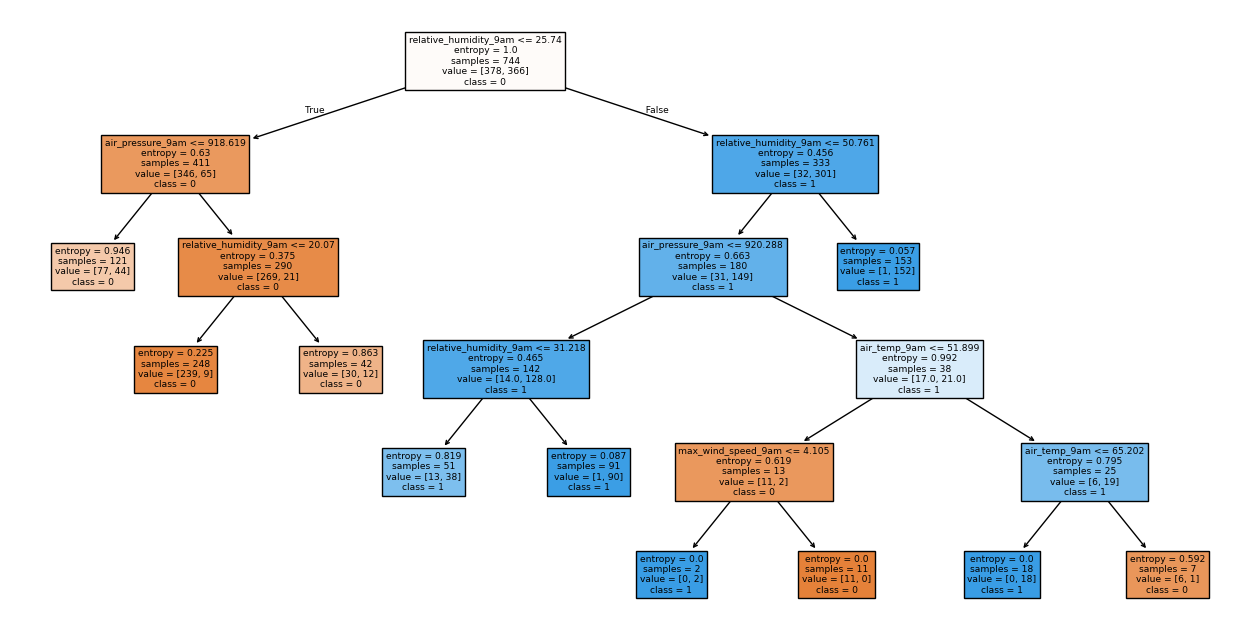

In [91]:
plt.figure(figsize=(16,8))
tree.plot_tree(dt, feature_names=x_train.columns, class_names=['0','1'], filled=True)
plt.show()

In [93]:
# !pip install graphviz

In [29]:
# !conda install -c conda-forge python-graphviz graphviz

In [95]:
# from sklearn.tree import DecisionTreeClassifier,export_graphviz
# from sklearn import tree
# from IPython.display import SVG #Scalable Vector Graphics
# from graphviz import Source
# from IPython.display import display

In [97]:
# graph = Source(tree.export_graphviz(dt,out_file=None,
#                                     feature_names=x_train.columns,class_names=['0','1'], filled=True))
# display(SVG(graph.pipe(format='svg')))